## Project Overview

This exploratory data analysis (EDA) aims to understand customer demographics,
spending behavior, and campaign engagement to support downstream customer
segmentation and clustering analysis.

Key objectives:
- Identify high-level customer demographics 
- Understand spending patterns across product categories
- Analyze marketing campaign engagement
- Analyze purchase and visit channel distribution
- Prepare insights for clustering and personalization


To make the analysis interpretable, variables are grouped into four categories:
- **People**: demographic and household attributes
- **Products**: spending across product categories
- **Promotion**: campaign acceptance and engagement
- **Place**: purchase and visit channels


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler    
import plotly.express as px

In [5]:
df = pd.read_csv("marketing_campaign.csv",sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [44]:
# Displays summary statistics for the numeric and categorical columns
dtypes = df.dtypes.value_counts()

for _type in dtypes.index:
    print(f"----------Variable Summary Statistics for {_type} variables----------", end = "\n\n")
    display(df.describe(include = _type).T)
    print("", end = "\n\n")

----------Variable Summary Statistics for int64 variables----------



,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0




----------Variable Summary Statistics for object variables----------



,count,unique,top,freq
Education,2240,5,Graduation,1127
Marital_Status,2240,8,Married,864
Dt_Customer,2240,663,31-08-2012,12




----------Variable Summary Statistics for float64 variables----------



,count,mean,std,min,25%,50%,75%,max
Income,2216.0,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.0,666666.0


## Exploratory Data Analysis (EDA)

### 1. People Insights

Analysing Variables below to understand the demographic and houehold atrributes of the customer base.

| Variable        | Description                                                     |
|-----------------|-----------------------------------------------------------------|
| Year_Birth      | Customer's birth year                                           |
| Education       | Customer's education level                                     |
| Marital_Status  | Customer's marital status                                      |
| Income          | Customer's yearly household income                              |
| Kidhome         | Number of children in the customer's household                  |
| Teenhome        | Number of teenagers in the customer's household                 |
| Dt_Customer     | Date of customer's enrollment with the company                  |
| Recency         | Number of days since the customer's last purchase               |
| Complain        | 1 if the customer complained in the last 2 years, 0 otherwise   |



#### Feature Engineering for Demographic Understanding

To better understand customer demographics and lifecycle characteristics, several new attributes are created and existing categorical variables are cleaned. 

**Key steps include:**

1. **Age Calculation**  
   Customer age is derived from the year of birth to enable age-based demographic analysis and comparison across customer groups.

2. **Education Category Standardization**  
   Education levels are cleaned and consolidated to ensure consistent categorization, reducing redundancy and improving analytical clarity.

3. **Marital Status Category Standardization**  
   Marital status values are standardized by grouping similar categories and correcting inconsistencies, allowing for more meaningful demographic comparisons.

4. **Family Size Calculation**  
   Family size can directly impact the volumn of purchase, based on the marital status and the data available on the no.of kids and no.of teens at home, family size is computed.    

5. **Customer Tenure Creation**  
   Customer tenure is calculated based on the number of days since enrollment with the company. This feature helps distinguish new customers from long-standing ones and provides insight into customer loyalty and lifecycle stage.

6. **Recency-Based Customer Categorization**  
   Customers are categorized into engagement groups based on the number of days since their last purchase. This classification highlights purchasing activity levels and supports the identification of active, at-risk, and inactive customers.



*These engineered features enhance demographic insights and form a strong foundation for behavioral analysis and customer segmentation.*



In [6]:
### 1. Creating a new column for customer age

df["Age"] = 2025 - df["Year_Birth"]

### 2. Education Category Standardization
# The education levels include ("2n Cycle", "Basic", "Graduation", "Master", "PhD"). We will standardize these into common categories.
education_mapping = {
    "2n Cycle": "Graduate",
    "Basic": "Basic",
    "Graduation": "Graduate",
    "Master": "Postgraduate",
    "PhD": "Postgraduate" }

df["Education"] = df["Education"].map(education_mapping)

### 3. Marital Status Category Standardization
# The marital status includes ("Single", "Married", "Together", "Divorced", "Widow", "Alone", "Absurd", "YOLO"). We will standardize these into common categories.
marital_mapping = {
    "Single": "Single", 
    "Married": "Married",
    "Together": "Married",
    "Divorced": "Divorced",
    "Widow": "Divorced",
    "Alone": "Single",
    "Absurd": "Single",
    "YOLO": "Single" }

df["Marital_Status"] = df["Marital_Status"].map(marital_mapping)

### 4. Family Size Calculation
#Creating a variable to calculate the family size. (Number of adults + number of kids)
df["Family_Size"] = df["Marital_Status"].apply(
    lambda x: 2 if x == "Married" else 1
) + df["Kidhome"] + df["Teenhome"]


### 5. Customer Tenure Creation
# Converting Dt_Customer to datetime, specifying dayfirst
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], dayfirst=True)

# Calculating customer tenure in years as of 2025-01-01
df["Customer_Tenure_Years"] = (
    (pd.Timestamp("2025-01-01") - df["Dt_Customer"]).dt.days / 365
).round(1)


### 6. Recency-Based Customer Categorization
def Frequency(recentcy):
    if recentcy<= 20:
        return "Active"
    elif recentcy<= 40:
        return "Recently Active"    
    elif recentcy <=60:
        return "At Risk"
    elif recentcy <= 80:
        return "Inactive"   
    else:
        return "Churned" 
      
df["Recency_Category"]= df["Recency"].apply(Frequency)

#### People Insights Dashboard

Created the below dashboard using **GitHub Copilot Agents**.

You can view the dashboard at the link below:

[View Dashboard](http://localhost:8000/eda_outputs/dashboard.html)

> If the link does not open, please run the code block below to generate the dashboard locally.


In [70]:
from IPython.display import IFrame, HTML, display
import os
try:
    display(IFrame('http://localhost:8000/eda_outputs/dashboard.html', width=1000, height=800))
except Exception as e:
    print('IFrame failed, attempting fallback to inline HTML:', e)
    try:
        with open('eda_outputs/dashboard.html','r',encoding='utf8') as f:
            html = f.read()
        display(HTML(html))
    except Exception as e2:
        print('Fallback failed:', e2)
        raise

#### Family Size Analysis

Family size can directly drive sales. By having an understanding of the family composition the company will be able to better target promotions and any marketing campaigns. 

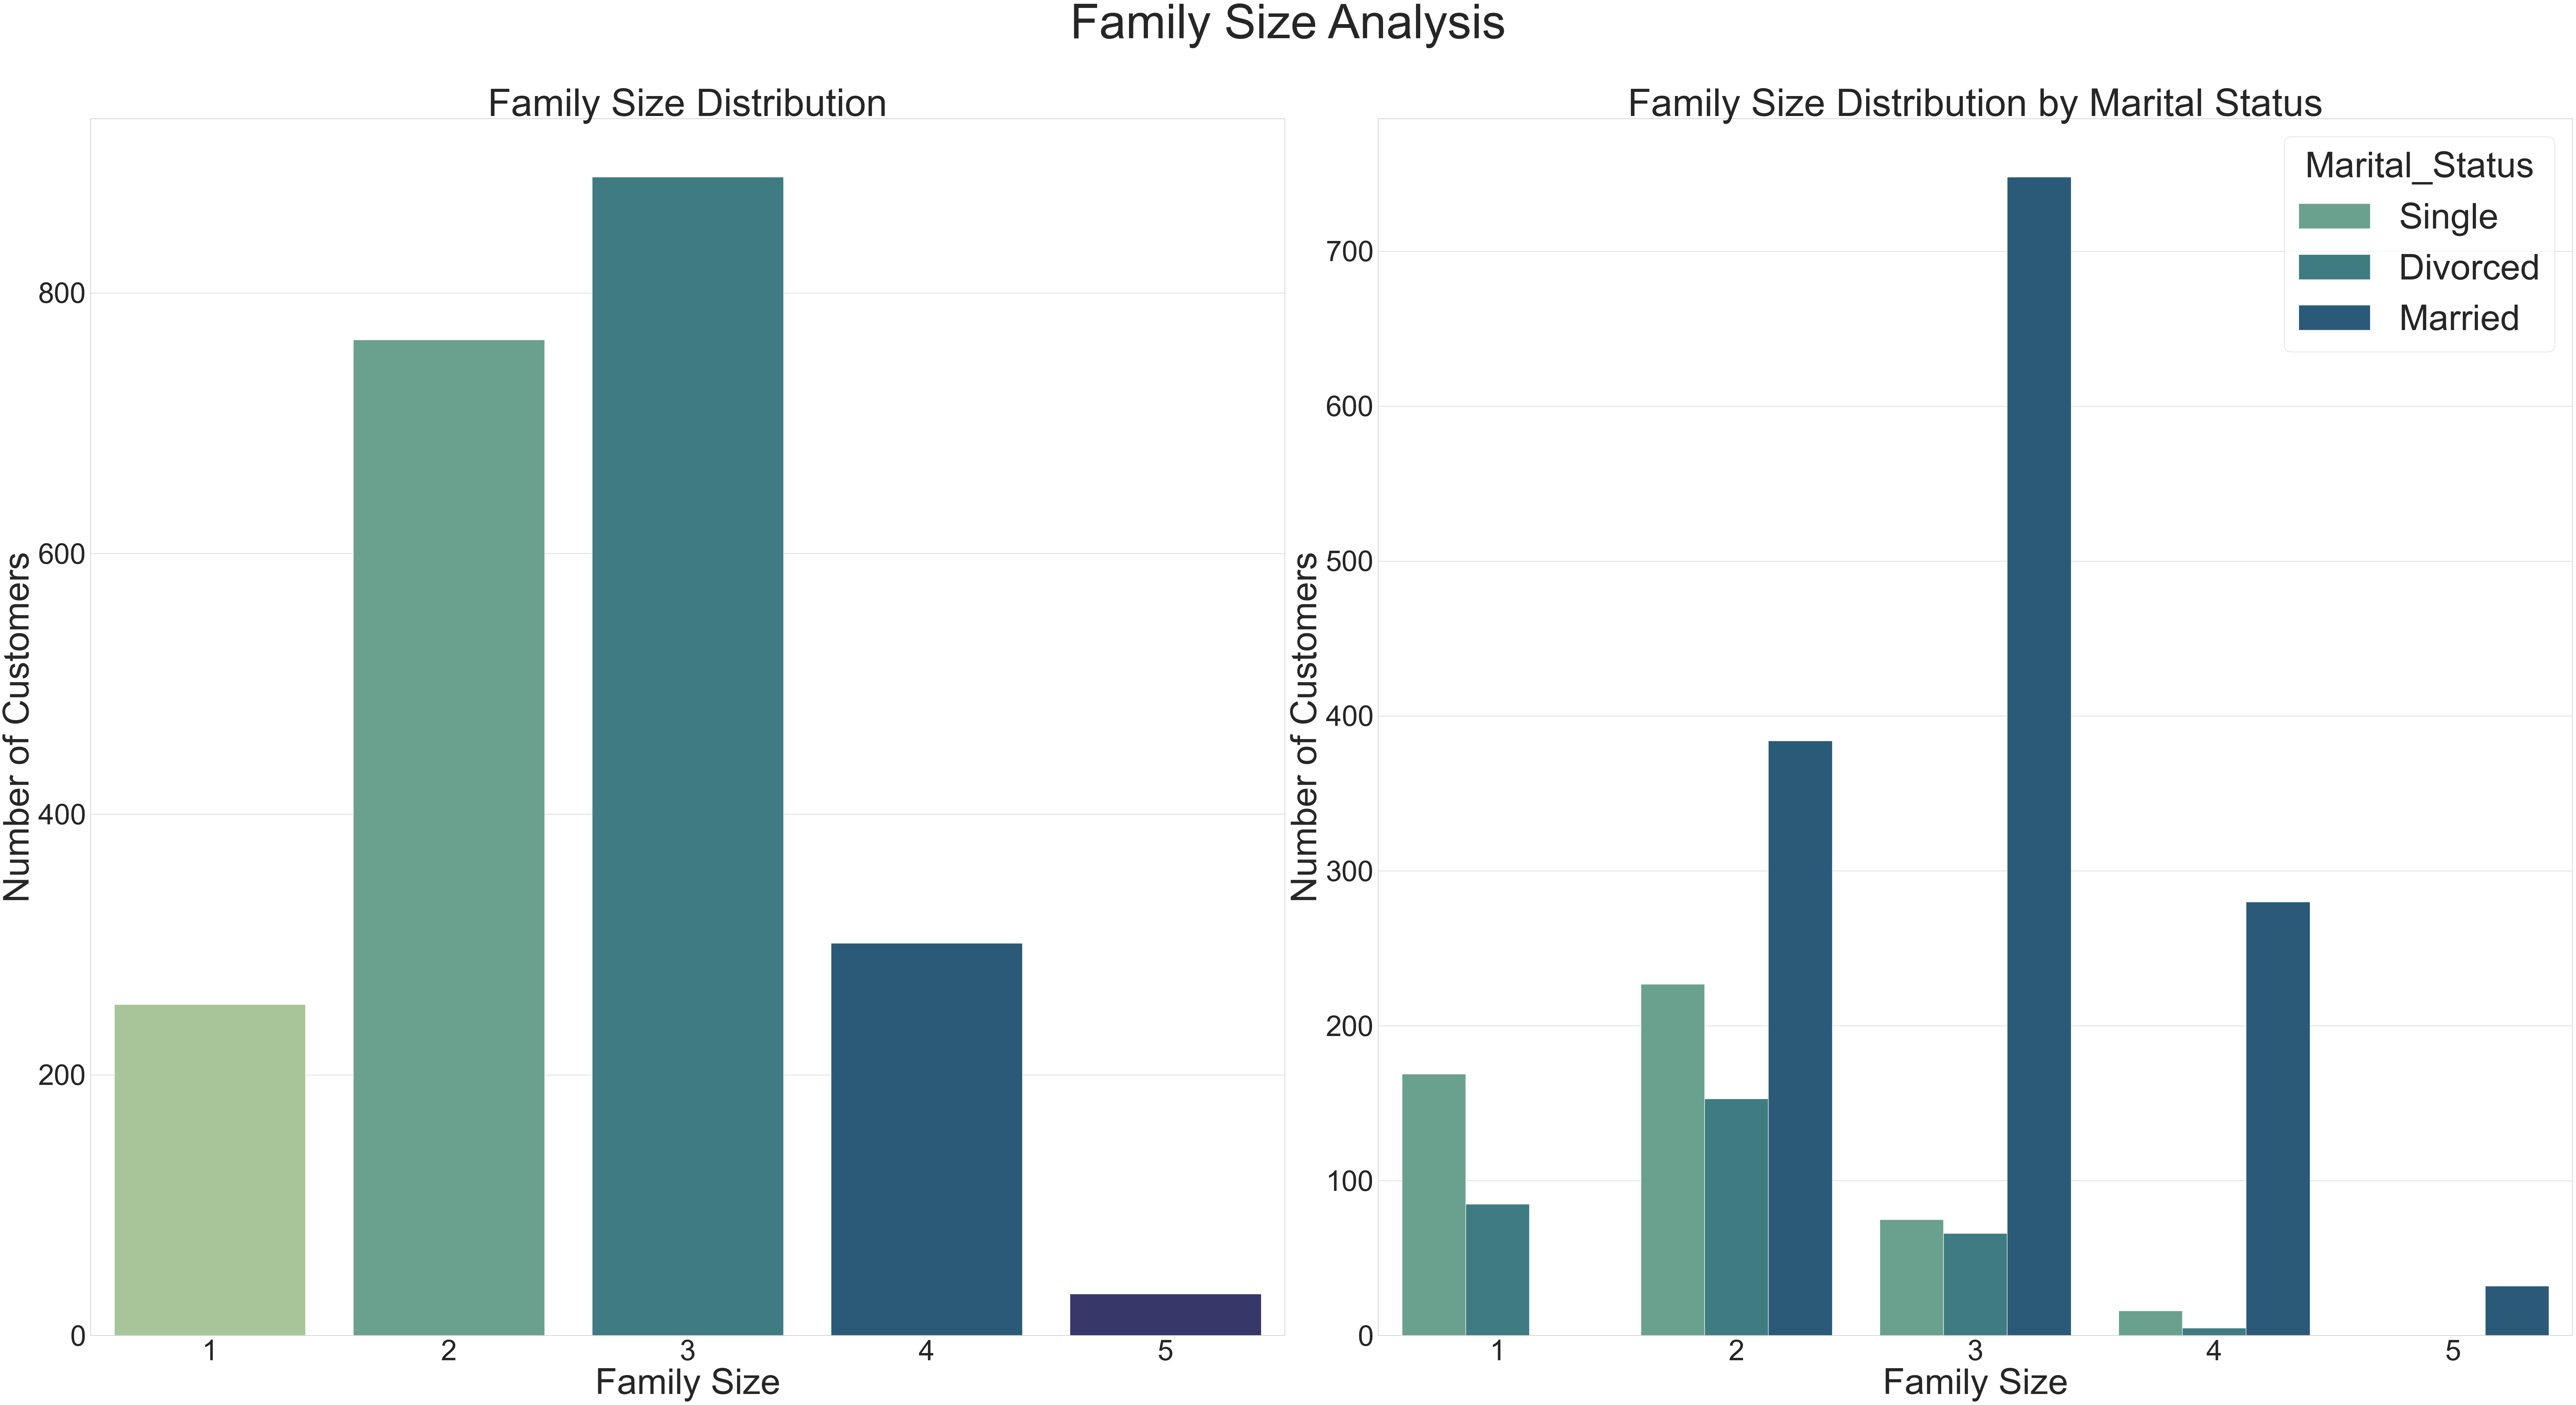

In [ ]:
# Plotting Family Size Distribution
# Setting overall style
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(75, 40))
fig.suptitle("Family Size Analysis", fontsize=110, y=1.02)

# Family Size Distribution
sns.countplot(data=df,x='Family_Size',palette="crest",hue='Family_Size', ax=axes[0], legend=False)

axes[0].set_title("Family Size Distribution")
axes[0].set_xlabel("Family Size")
axes[0].set_ylabel("Number of Customers")


# Family Size ditribution by Marital Status
sns.countplot(data=df,x='Family_Size',palette="crest",hue='Marital_Status', ax=axes[1])

axes[1].set_title("Family Size Distribution by Marital Status")
axes[1].set_xlabel("Family Size")    
axes[1].set_ylabel("Number of Customers")

for ax in axes:
    ax.set_title(ax.get_title(), fontsize=80)
    ax.set_xlabel(ax.get_xlabel(), fontsize=75)
    ax.set_ylabel(ax.get_ylabel(), fontsize=75)
    ax.tick_params(axis='both', labelsize=60)

    # Legend (if exists)
    if ax.get_legend() is not None:
        ax.legend(
            title=ax.get_legend().get_title().get_text(),
            fontsize=75,
            title_fontsize=75
        )

plt.tight_layout()
plt.show()


Majority of the customers have a family size of 3, to understand the composition better I have created a visual to see the family size distribution by marital status.

Dependents are defined as children and/or teenagers.

1. Single and divorced individuals may live with dependents, indicating non-traditional family structures.

2. The largest customer segment consists of households with three members, typically two adults and one dependent.

3. Single or divorced individuals with more than one dependent represent a very small portion of the customer base.

### 2. Product Insights  

Analysing Variables below to understand the customer spending based on product Category.

| Variable            | Description                                   |
|---------------------|-----------------------------------------------|
| MntWines        | Amount spent on wine in the last 2 years      |
| MntFruits      | Amount spent on fruits in the last 2 years    |
| MntMeatProducts | Amount spent on meat in the last 2 years      |
| MntFishProducts | Amount spent on fish in the last 2 years      |
| MntSweetProducts| Amount spent on sweets in the last 2 years    |
| MntGoldProds    | Amount spent on gold in the last 2 years      |



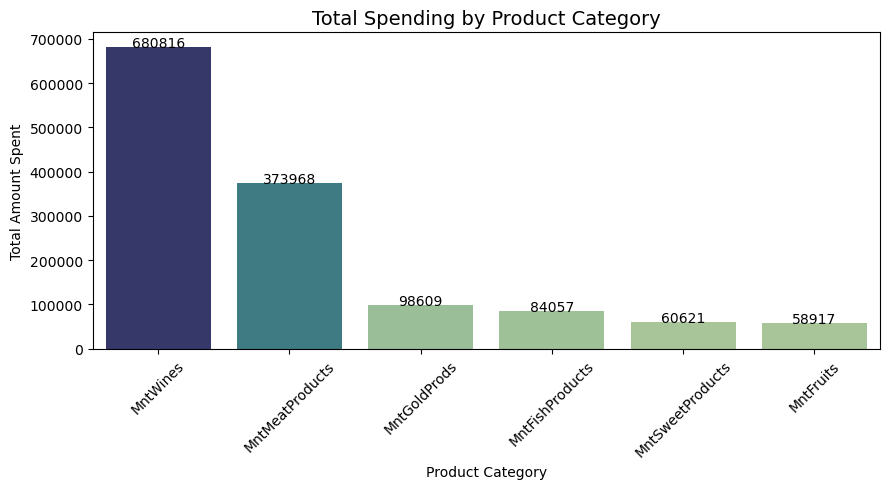

In [33]:
product_cols = [
    "MntWines", "MntFruits", "MntMeatProducts",
    "MntFishProducts", "MntSweetProducts", "MntGoldProds"
]

# Calculating total spend per product
total_spend = df[product_cols].sum().reset_index()
total_spend.columns = ["Product", "TotalSpend"]

# Sorting in descending order
total_spend = total_spend.sort_values(by="TotalSpend", ascending=False)

# Plotting
plt.figure(figsize=(9,5))
ax= sns.barplot(data=total_spend,x="Product",y="TotalSpend",palette="crest",hue="TotalSpend", dodge=False, legend=False )

# Adding counts on top of bars
for idx, row in enumerate(total_spend.itertuples()):
    ax.text(
        idx,
        row.TotalSpend + 0.5,
        f"{row.TotalSpend}",
        ha='center',
        fontsize=10
    )

plt.title("Total Spending by Product Category", fontsize=14)
plt.xlabel("Product Category")
plt.ylabel("Total Amount Spent")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- Wines and meat products account for the highest spending, indicating strong customer preference for premium or frequently purchased items.

- Fruit purchases have the lowest overall spending, suggesting either lower prices, lower purchase frequency, or both.

- Wine products may be priced higher than other categories (assuming Gold refers to a product brand rather than precious metals).
Having volume or quantity data would provide deeper insight into whether high spending is driven by price, frequency, or purchase volume.



### 3. Promotion Insights

Analysing below variables to measure marketing campaign engagement 

| Column Name        | Description                                             |
|-------------------|---------------------------------------------------------|
| NumDealsPurchases  | Number of purchases made with a discount               |
| AcceptedCmp1       | 1 if customer accepted the offer in the 1st campaign, 0 otherwise |
| AcceptedCmp2       | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise |
| AcceptedCmp3       | 1 if customer accepted the offer in the 3rd campaign, 0 otherwise |
| AcceptedCmp4       | 1 if customer accepted the offer in the 4th campaign, 0 otherwise |
| AcceptedCmp5       | 1 if customer accepted the offer in the 5th campaign, 0 otherwise |
| Response           | 1 if customer accepted the offer in the last campaign, 0 otherwise |


#### 3.1 Deal Purchase Distribution

Distribution of purchases made with a discount

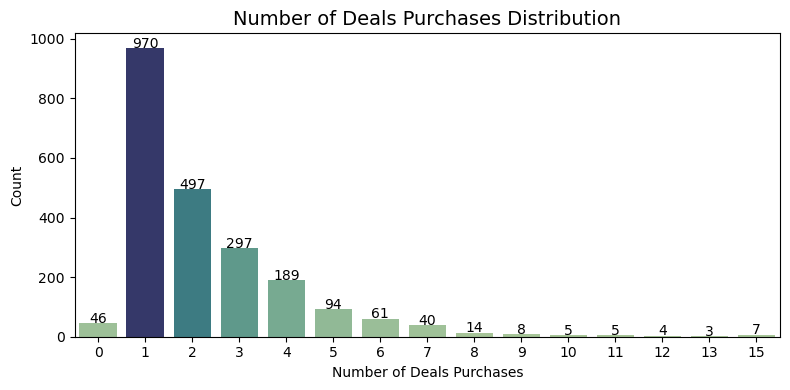

In [142]:
# Count number of customers per NumDealsPurchases
deal_counts = df['NumDealsPurchases'].value_counts().sort_index().reset_index()
deal_counts.columns = ['NumDealsPurchases', 'Count']

plt.figure(figsize=(8,4))
ax = sns.barplot(data=deal_counts, x='NumDealsPurchases',y='Count',hue='Count', palette="crest",legend=False, dodge=False)

# Adding counts on top of bars
for i, row in deal_counts.iterrows():
    ax.text(
        i,
        row['Count'] + 0.5,  # slightly above the bar
        f"{row['Count']}",
        ha='center',
        fontsize=10
    )

plt.title("Number of Deals Purchases Distribution", fontsize=14)
plt.xlabel("Number of Deals Purchases")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Majority of the customers have taken advantage of at least one discount. A very few have taken advange of more than 5 deals.

#### 3.2 Campaign Response
   
3.2.1 Total Accepted Campaigns    
     Customer response to the 6 campaigns conducted by the business.

3.2.2 Customer Engagement Across Marketing Campaigns
    



  ##### 3.2.1 Total Accepted Campaigns

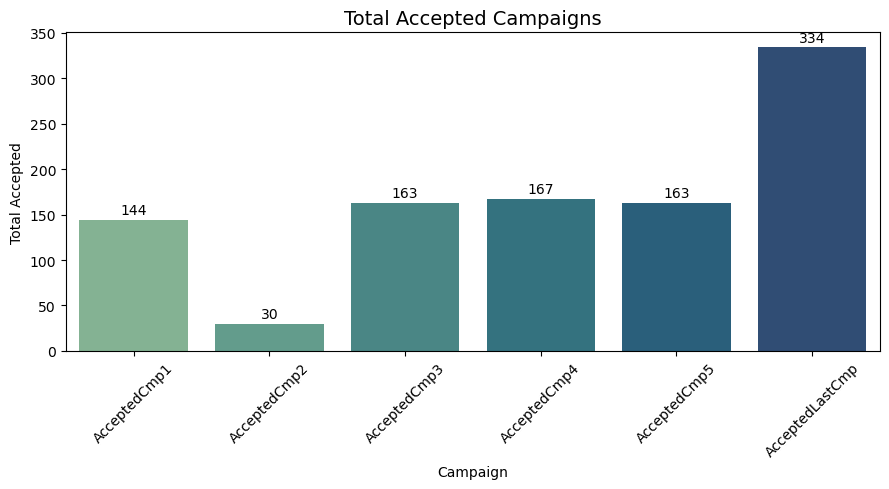

In [ ]:
campaign_cols = [
    "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3",
    "AcceptedCmp4", "AcceptedCmp5", "Response"
]

# Prepare data
campaign_counts = (
    df[campaign_cols]
    .sum()
    .reset_index()
)

campaign_counts.columns = ["Campaign", "Total_Accepted"]

campaign_counts["Campaign"] = campaign_counts["Campaign"].replace({
    "Response": "AcceptedLastCmp"
})

# Plot
plt.figure(figsize=(9, 5))
ax = sns.barplot(
    data=campaign_counts,
    x="Campaign",
    y="Total_Accepted",
    palette="crest", hue="Campaign"
)

# Add labels on top of bars
for container in ax.containers:
    ax.bar_label(container, padding=2)

plt.title("Total Accepted Campaigns", fontsize=14)
plt.xlabel("Campaign")
plt.ylabel("Total Accepted")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Majority of the customers have accepted the final campaign only a very few have accepted the second campaign.

##### 3.2.2 Customer Engagement Across Marketing Campaigns

Creating a new feature to identify how many campaigns a customer has accepted.

In [99]:
#Creating a new feature for total campaigns accepted by each customer
df["Total_Accepted_Campaigns"] = df[campaign_cols].sum(axis=1)

bins = [-1, 0, 1, 2, 3, 4, 5, 6]
labels = [
    "None",
    "1 Campaign",
    "2 Campaigns",
    "3 Campaigns",
    "4 Campaigns",
    "5 Campaigns",
    "All 6 Campaigns"
]

df["Campaign_Engagement_Level"] = pd.cut(
    df["Total_Accepted_Campaigns"],
    bins=bins,
    labels=labels
)

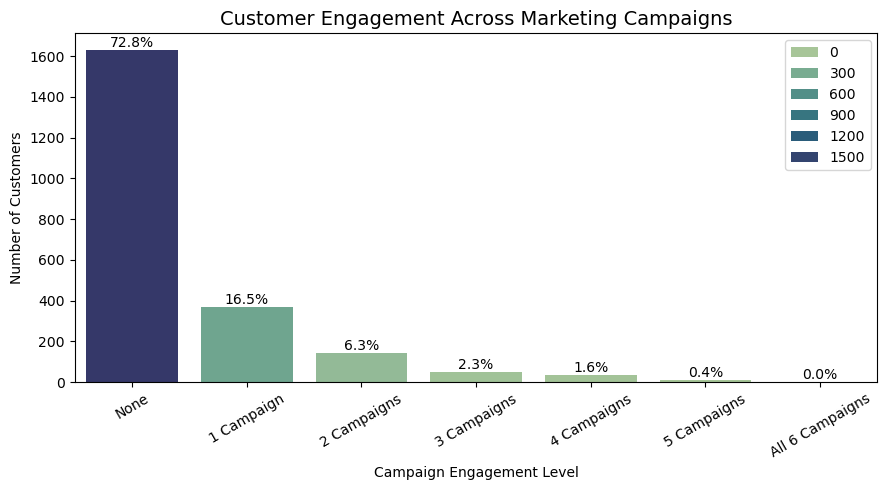

In [131]:
# Count customers per engagement level
engagement_counts = (
    df["Campaign_Engagement_Level"]
    .value_counts()
    .sort_index()
)

# Calculate percentages
percentages = (engagement_counts / engagement_counts.sum()) * 100

# Plot
plt.figure(figsize=(9,5))
ax = sns.barplot(
    x=engagement_counts.index,
    y=engagement_counts.values,
    palette="crest", hue=engagement_counts.values, dodge=False
)

# Add percentage labels on bars
for i, (count, pct) in enumerate(zip(engagement_counts.values, percentages.values)):
    ax.text(i,count,f"{pct:.1f}%",ha="center",va="bottom",fontsize=10)
plt.title("Customer Engagement Across Marketing Campaigns", fontsize=14)
plt.xlabel("Campaign Engagement Level")
plt.ylabel("Number of Customers")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


The majority of customers have not accepted any marketing campaigns, indicating overall low campaign engagement. Approximately 16% of customers have accepted at least one campaign, while only about 1.6% have accepted four campaigns, highlighting a very small segment of highly engaged customers.

These results suggest that current campaign strategies may not be effectively resonating with the broader customer base. The company should reassess its campaign design, targeting, and messaging to identify drivers of low engagement and develop more personalized and data-driven strategies to improve customer response rates.

### 4. Place Insights


| Variable              | Description                                                     |
|-----------------------|-----------------------------------------------------------------|
| NumWebPurchases       | Number of purchases made through the company’s website          |
| NumCatalogPurchases   | Number of purchases made using a catalogue                      |
| NumStorePurchases     | Number of purchases made directly in physical stores            |
| NumWebVisitsMonth     | Number of visits to the company’s website in the last month     |


#### 4.1 Total Purchases by Purchase Mode

Analysing the purchase behaviour of customers based on Purchase mode (Website, Cataloge, In-store)

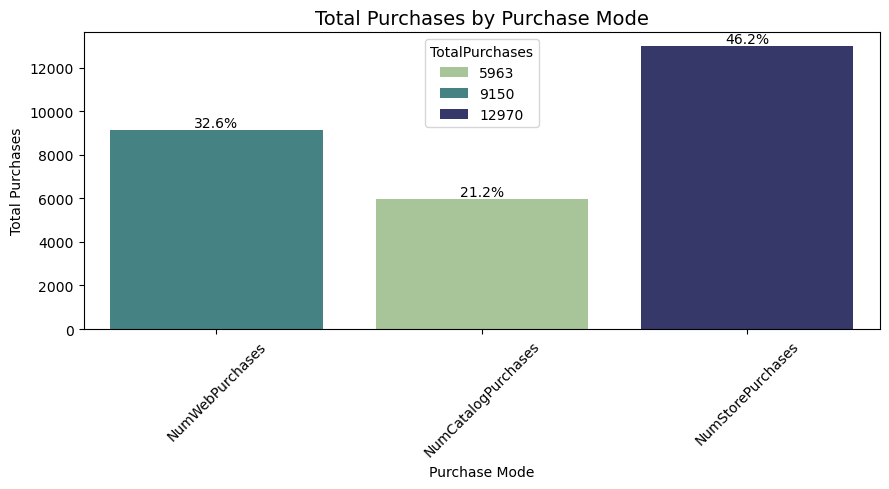

In [64]:
place_cols = [
    "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]

# Calculating total purchases based on purchase places
total_purchases = df[place_cols].sum().reset_index()
total_purchases.columns = ["Place", "TotalPurchases"]

#percentage of purchases by place
total_purchases['Percentage'] = (total_purchases['TotalPurchases'] / total_purchases['TotalPurchases'].sum()) * 100
plt.figure(figsize=(9,5))
ax = sns.barplot(data=total_purchases,x='Place',y='TotalPurchases', palette="crest",hue="TotalPurchases", dodge=False)

# Adding percentage labels on bars
for i, (count, pct) in enumerate(zip(total_purchases['TotalPurchases'], total_purchases['Percentage'])):
    ax.text(i,count,f"{pct:.1f}%",ha="center",va="bottom",fontsize=10)
    
plt.title("Total Purchases by Purchase Mode", fontsize=14)
plt.xlabel("Purchase Mode")
plt.ylabel("Total Purchases")      
plt.xticks(rotation=45)
plt.tight_layout()



Most number of customers make purchases by visiting the store about 46.2%. There's also a significant trend towards web purchases around 32.6%. 

#### 4.2. Distribution of number of website visits per month

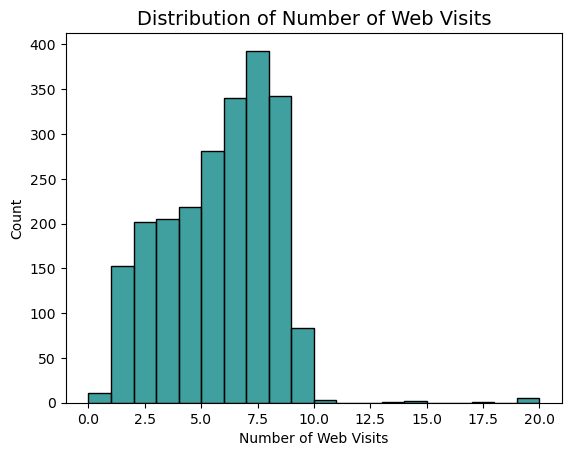

In [69]:
sns.histplot(data=df,x='NumWebVisitsMonth',bins=20,color='teal')
plt.title("Distribution of Number of Web Visits", fontsize=14)
plt.xlabel("Number of Web Visits")
plt.show()

In [71]:
df.NumWebVisitsMonth.describe()

count    2240.000000
mean        5.316518
std         2.426645
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        20.000000
Name: NumWebVisitsMonth, dtype: float64

On average, each customer visited the website at least five times during the month. The left-skewed distribution suggests that a substantial proportion of customers exhibit higher-than-average engagement, with frequent repeat visits.

In the absence of monthly data on website purchases, it is not possible to directly assess conversion efficiency. If such data were available, the visit-to-purchase conversion rate could be quantified to evaluate how effectively website traffic translates into sales outcomes.

### Coming Up!

Conducting a mix of analysis across various data fields

Ideas (To be Continued)

- Calculating Total Amount Spent (Total Sales) (Sum amounts spent on various products) 

        - Total sales across Education level, Marital_Status, Customer Status (Recency_Category), family size
        - Total sales across modes of purchase 
        - Total sales across customer tenure

- Purchase mode based on customer's active status (Try)

ex:
sns.FacetGrid(df, col="Cluster", hue="Cluster").map(
    sns.histplot, "Recency_Category", bins=50
)

- active status vs products 

- products vs place 

In [63]:
#Purchase mode based on customer's status 
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Family_Size', 'Customer_Tenure_Years', 'Recency_Category'],
      dtype='object')

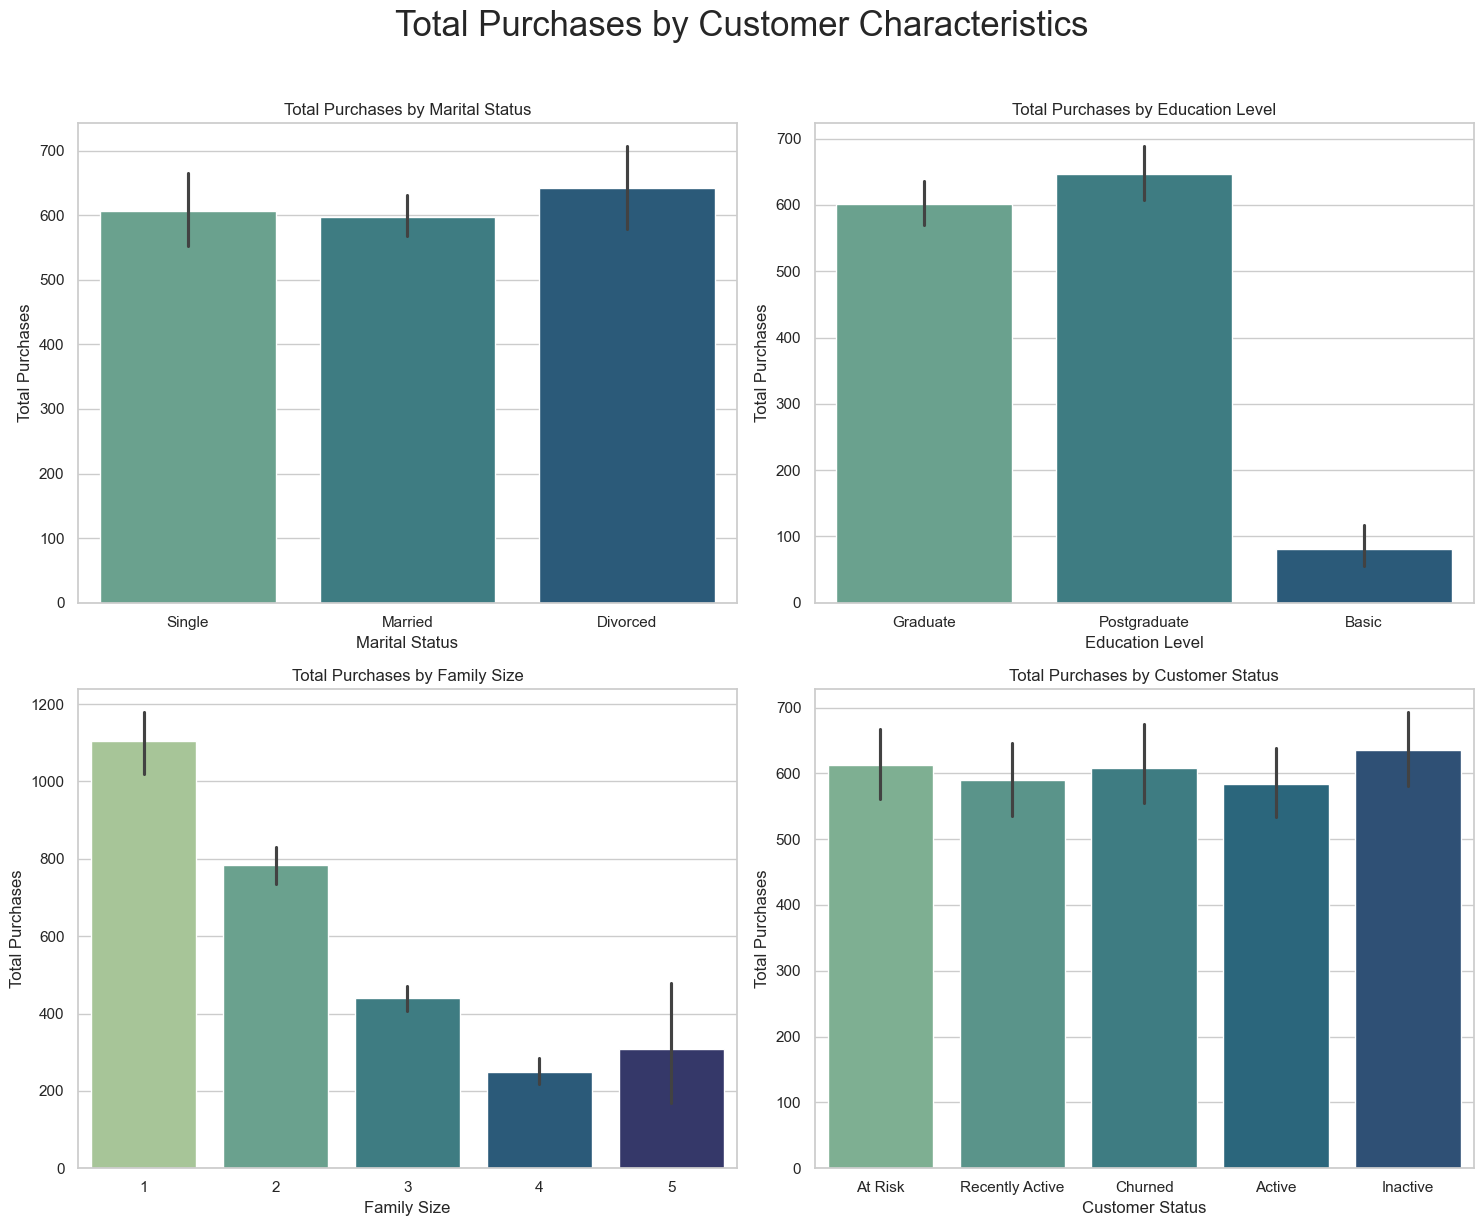

In [122]:
# Set overall style
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle("Total Purchases by Customer Characteristics", fontsize=25, y=1.02)

# 1. Marital Status
sns.barplot(data=df, x="Marital_Status",y="TotalPurchases",hue="Marital_Status",palette="crest",ax=axes[0, 0],legend=False)

axes[0, 0].set_title("Total Purchases by Marital Status")
axes[0, 0].set_xlabel("Marital Status")
axes[0, 0].set_ylabel("Total Purchases")

# 2. Education Level
sns.barplot(data=df,x="Education",y="TotalPurchases",hue="Education",palette="crest",ax=axes[0, 1],legend=False)

axes[0, 1].set_title("Total Purchases by Education Level")
axes[0, 1].set_xlabel("Education Level")
axes[0, 1].set_ylabel("Total Purchases")

# 3. Family Size
sns.barplot(data=df,x="Family_Size",y="TotalPurchases",hue="Family_Size",palette="crest",ax=axes[1, 0],legend=False)
axes[1, 0].set_title("Total Purchases by Family Size")
axes[1, 0].set_xlabel("Family Size")
axes[1, 0].set_ylabel("Total Purchases")

# 4. Customer Status
sns.barplot(data=df,x="Recency_Category",y="TotalPurchases",hue="Recency_Category",palette="crest",ax=axes[1, 1],legend=False)  

axes[1, 1].set_title("Total Purchases by Customer Status")
axes[1, 1].set_xlabel("Customer Status")
axes[1, 1].set_ylabel("Total Purchases")

plt.tight_layout()
plt.show()


In [124]:
df.to_csv("marketing_campaign_extended.csv", index=False)